## Problem:
- Build model for customer churn prediction
- Build Recommendatation to suggest additional products/services to customers
- Provide Insights on how the recommendation system can improve the customer retention.

In [1]:
# Import neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pwd

/Users/sumi/Desktop/CMP/Notebooks


In [4]:
# For moving to the root project directory
os.chdir('../')

In [5]:
!pwd

/Users/sumi/Desktop/CMP


### TASK 1: Exploratory Data Analysis (EDA)

In [6]:
# Loading the data
customer_data=pd.read_csv('DATA/Assignment_Data - ML_Intern_Assignment_Data.csv.csv')


In [7]:
# Viewing the top 5 records
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


### Dataset Description

- CustomerID: Unique Identifier for each customer.
- Gender: Gender of customer (male/female)
- Age: Age of the customer
- Tenure: Duration of subscription in months.
- MonthlyCharges: Monthly charges paid by the customer.
- TotalCharges: Total Charges accumulated by the customer
- PaymentMethod: Mode of payment customer used.
- Churn: Indicates whether customer churned
- ServiceUsage1,ServiceUsage2,ServiceUsage3 are the usage data for service 1,2 and 3 respectively.

In [8]:
# Let's get the info about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [9]:
# Let's have a look at the shape of the dataset
customer_data.shape

(200, 11)

In [10]:
# Let's Look for any missing values
customer_data.isna().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64

### From Above we can interpret that there are 200 entries of data meaning that the dataset has 200 rows and 11 columns. The dataset contains `No Null Values` and there are `4 Non-numerical columns` in the dataset.


In [11]:
# Let's have a look at all the columns of the dataset
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'PaymentMethod', 'Churn', 'ServiceUsage1',
       'ServiceUsage2', 'ServiceUsage3'],
      dtype='object')

In [12]:
# Let's see how many customers have chruned
churn_counts=customer_data['Churn'].value_counts()
churn_counts

Churn
No     158
Yes     42
Name: count, dtype: int64

### Most customers have not churned. And also the class `No` have significantly higher value than class `Yes` which is good for business but here it indicates class imbalance.

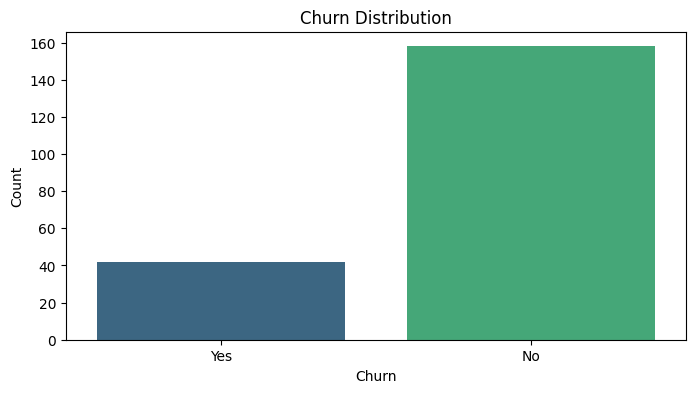

In [13]:
# Univariate Analysis: Churn Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=customer_data, x='Churn', palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [14]:
# Calculate churn rates by gender
churn_by_gender = customer_data.groupby('Gender')['Churn'].value_counts(normalize=True).unstack()
churn_by_gender = churn_by_gender * 100  # Convert to percentages for better readability
churn_by_gender


Churn,No,Yes
Gender,,
Female,85.217391,14.782609
Male,70.588235,29.411765


### This indicates male have slightly higher churn rate.

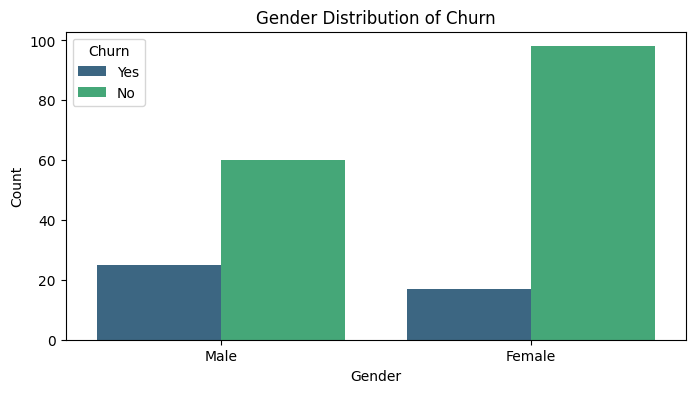

In [15]:
# Univariate Analysis: Gender Distribution by churn
plt.figure(figsize=(8, 4))
sns.countplot(data=customer_data, x='Gender', hue='Churn', palette='viridis')
plt.title('Gender Distribution of Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

In [16]:
# Let's get the statistics of the data
customer_data.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


In [17]:
# From above we can see the averages for age, tebure, monthlycharges etc. However let's calculate it to store to store and use them later
avg_age=customer_data['Age'].mean()
avg_tenure=customer_data['Tenure'].mean()
avg_monthly_charge=customer_data['MonthlyCharges'].mean()
avg_total_charge=customer_data['TotalCharges'].mean()

print(f'Average Age: {avg_age}')
print(f'Average tenure: {avg_tenure}')
print(f'Average Monthly charges: {avg_monthly_charge}')
print(f'Average Total Charges: {avg_total_charge}')


Average Age: 42.41
Average tenure: 35.945
Average Monthly charges: 82.97515
Average Total Charges: 5040.98665


In [18]:
# Filter customers with average tenure and above-average monthly charges
avg_tenure_customers = customer_data[(customer_data['Tenure'] == round(avg_tenure)) & (customer_data['MonthlyCharges'] > avg_monthly_charge)]

# Calculate churn rate among filtered customers
if not avg_tenure_customers.empty:
    churn_rate = (avg_tenure_customers['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate for customers with average tenure ({round(avg_tenure)}) and above-average monthly charges (${avg_monthly_charge:.2f}): {churn_rate:.2f}%")
else:
    print("No customers match the criteria.")
    
    
# Filter customers with greater than average tenure and above-average monthly charges
above_avg_tenure_customers = customer_data[(customer_data['Tenure'] > round(avg_tenure)) & (customer_data['MonthlyCharges'] > avg_monthly_charge)]

# Calculate churn rate among filtered customers
if not avg_tenure_customers.empty:
    churn_rate = (above_avg_tenure_customers['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate for customers with above average tenure ({round(avg_tenure)}) and above-average monthly charges (${avg_monthly_charge:.2f}): {churn_rate:.2f}%")
else:
    print("No customers match the criteria.")
    
    
# Filter customers with less than average tenure and above-average monthly charges
less_avg_tenure_customers = customer_data[(customer_data['Tenure'] < round(avg_tenure)) & (customer_data['MonthlyCharges'] > avg_monthly_charge)]

# Calculate churn rate among filtered customers
if not avg_tenure_customers.empty:
    churn_rate = (less_avg_tenure_customers['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate for customers with less than average tenure ({round(avg_tenure)}) and above-average monthly charges (${avg_monthly_charge:.2f}): {churn_rate:.2f}%")
else:
    print("No customers match the criteria.")
    
    
# Filter customers with less than average tenure and less-average monthly charges
less_avg_tenure_customers = customer_data[(customer_data['Tenure'] < round(avg_tenure)) & (customer_data['MonthlyCharges'] < avg_monthly_charge)]

# Calculate churn rate among filtered customers
if not avg_tenure_customers.empty:
    churn_rate = (less_avg_tenure_customers['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate for customers with less than average tenure ({round(avg_tenure)}) and less-average monthly charges (${avg_monthly_charge:.2f}): {churn_rate:.2f}%")
else:
    print("No customers match the criteria.")
    

# Filter customers with average tenure and average monthly charges
avg_tenure_customers = customer_data[(customer_data['Tenure'] == round(avg_tenure)) & (customer_data['MonthlyCharges'] == avg_monthly_charge)]

# Calculate churn rate among filtered customers
if not avg_tenure_customers.empty:
    churn_rate = (less_avg_tenure_customers['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate for customers with average tenure ({round(avg_tenure)}) and average monthly charges (${avg_monthly_charge:.2f}): {churn_rate:.2f}%")
else:
    print("No customers match the criteria.")



Churn Rate for customers with average tenure (36) and above-average monthly charges ($82.98): 0.00%
Churn Rate for customers with above average tenure (36) and above-average monthly charges ($82.98): 20.00%
Churn Rate for customers with less than average tenure (36) and above-average monthly charges ($82.98): 21.74%
Churn Rate for customers with less than average tenure (36) and less-average monthly charges ($82.98): 22.45%
No customers match the criteria.


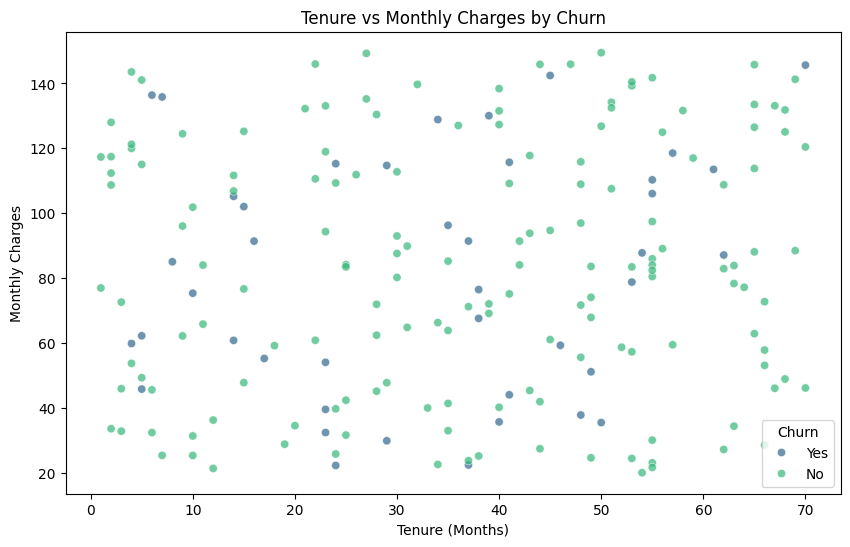

In [19]:
# Bivariate Analysis: Relationship between Tenure and Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Tenure', y='MonthlyCharges', hue='Churn', palette='viridis', alpha=0.7)
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.show()

### Observations: Tenure & Monthly Charges
- Customers with shorter tenures are more likely to churn
- High Monthly charges are associated with higher churn rates.

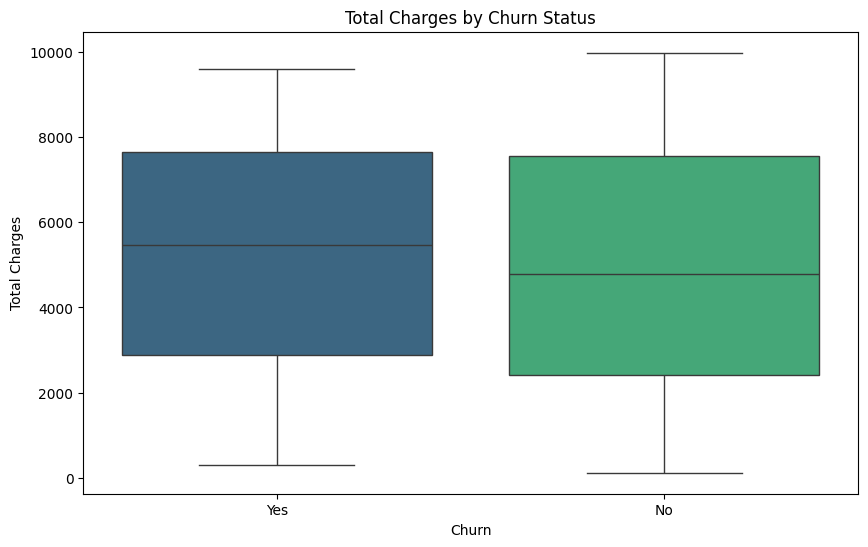

In [20]:
# Bivariate Analysis: Total Charges and Monthly Charges by Churn Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='Churn', y='TotalCharges', palette='viridis')
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

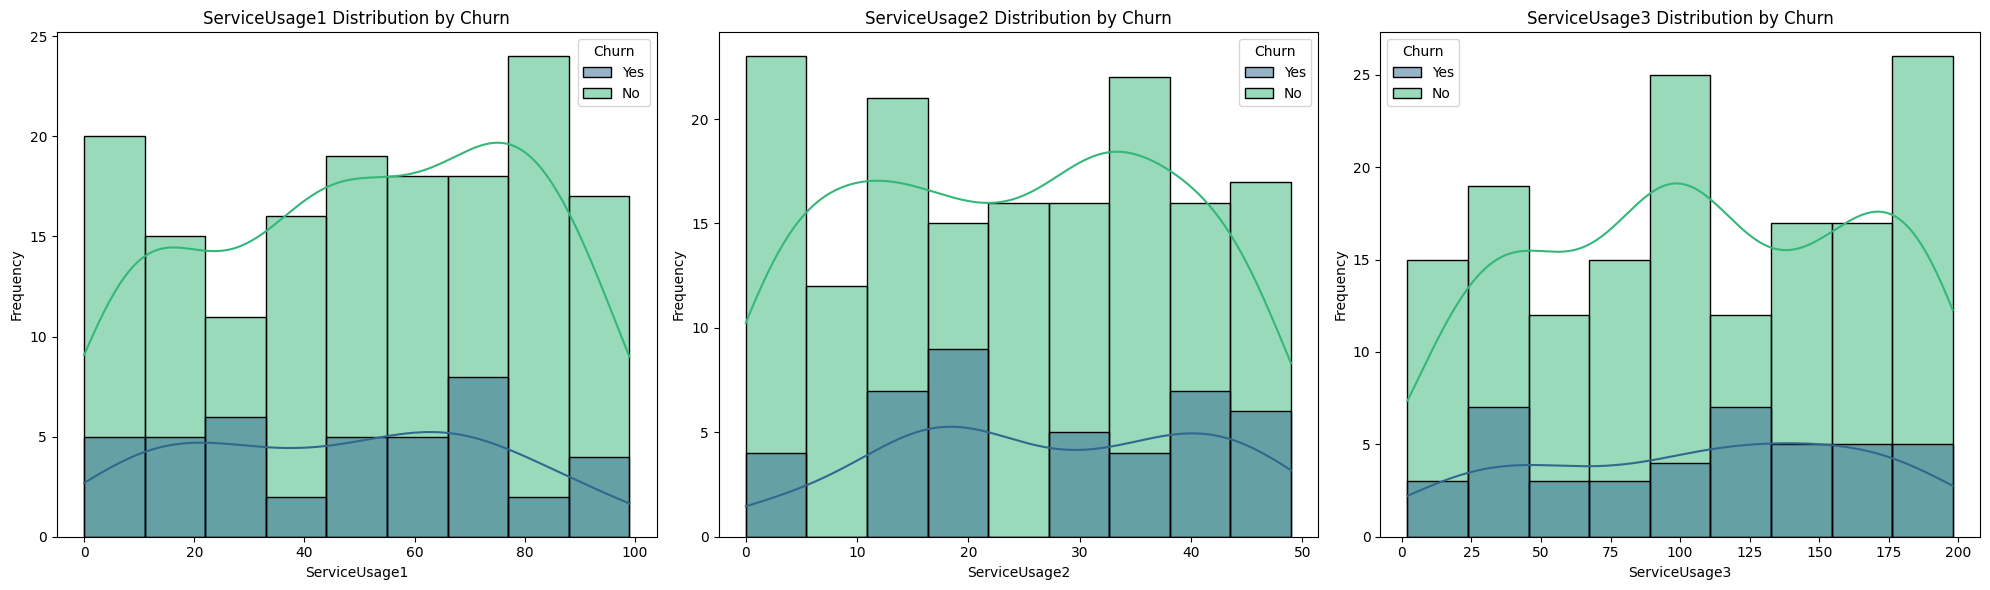

In [21]:
# Service Usage Analysis: Distribution of Service Usage by Churn
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, service in enumerate(['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']):
    sns.histplot(data=customer_data, x=service, hue='Churn', kde=True, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{service} Distribution by Churn')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### `ServiceUsage1`, `ServiceUsage2`, and `ServiceUsage3` have varied distributions among churners and non-churners, warranting further analysis.

### Task 2: Feature Engineering

### Converting data to Numerical.

In [22]:
# Let's view our data again
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


Now Let's convert all `categorical` columns of our dataset to `Numerical`

In [23]:
# Converting CustomerID to Numerical (CUST0001->1)

customer_data['CustomerID']=customer_data['CustomerID'].str.replace('CUST', '').astype(int)

# Verify the transformation
customer_data.head()


,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,1,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,2,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,3,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,4,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,5,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [24]:
# Now Let's convert gender and churn to numerical format
# For this we'll be utilizing LabelEncoder from sklearn as these are binary values

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

customer_data['Churn']=label_encoder.fit_transform(customer_data['Churn'])  # Yes->1, No->0

In [25]:
# Similarly for Gender
customer_data['Gender']=label_encoder.fit_transform(customer_data['Gender']) # Male->1, Female->0


In [26]:
# Let's verify the changes
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,1,1,20,5,62.31,2950.41,Credit Card,1,59,20,63
1,2,0,25,23,118.96,7460.55,Bank Transfer,0,42,41,136
2,3,0,25,39,69.20,3064.73,Bank Transfer,0,65,0,165
3,4,1,56,47,145.90,2612.22,Cash,0,64,40,169
4,5,0,33,69,88.51,4833.99,Cash,0,62,1,54


In [27]:
customer_data['PaymentMethod'].unique

<bound method Series.unique of 0        Credit Card
1      Bank Transfer
2      Bank Transfer
3               Cash
4               Cash
           ...      
195      Credit Card
196           PayPal
197      Credit Card
198           PayPal
199           PayPal
Name: PaymentMethod, Length: 200, dtype: object>

In [28]:
# Now Let's Group PaymentMethod into digital or cash 
digital_methods=['Bank Transfer','Credit Card','PayPal']

customer_data['PaymentGroup']=customer_data['PaymentMethod'].apply(
    lambda x: 'Digital' if x in digital_methods else 'Cash'
)


In [29]:
# Let's verify
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup
0,1,1,20,5,62.31,2950.41,Credit Card,1,59,20,63,Digital
1,2,0,25,23,118.96,7460.55,Bank Transfer,0,42,41,136,Digital
2,3,0,25,39,69.20,3064.73,Bank Transfer,0,65,0,165,Digital
3,4,1,56,47,145.90,2612.22,Cash,0,64,40,169,Cash
4,5,0,33,69,88.51,4833.99,Cash,0,62,1,54,Cash


In [30]:
customer_data.PaymentGroup.unique

<bound method Series.unique of 0      Digital
1      Digital
2      Digital
3         Cash
4         Cash
        ...   
195    Digital
196    Digital
197    Digital
198    Digital
199    Digital
Name: PaymentGroup, Length: 200, dtype: object>

In [31]:
# Now Let's transform the PaymentGroup into Numerical format
customer_data['PaymentGroup']=label_encoder.fit_transform(customer_data['PaymentGroup'])    # Digital->1, Cash->0


In [32]:
# Verify
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup
0,1,1,20,5,62.31,2950.41,Credit Card,1,59,20,63,1
1,2,0,25,23,118.96,7460.55,Bank Transfer,0,42,41,136,1
2,3,0,25,39,69.20,3064.73,Bank Transfer,0,65,0,165,1
3,4,1,56,47,145.90,2612.22,Cash,0,64,40,169,0
4,5,0,33,69,88.51,4833.99,Cash,0,62,1,54,0


In [33]:
# Now the PaymentMethod is redundant so let's drop it
customer_data.drop(columns=['PaymentMethod'],inplace=True)

In [34]:
# View the dataset again
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup
0,1,1,20,5,62.31,2950.41,1,59,20,63,1
1,2,0,25,23,118.96,7460.55,0,42,41,136,1
2,3,0,25,39,69.20,3064.73,0,65,0,165,1
3,4,1,56,47,145.90,2612.22,0,64,40,169,0
4,5,0,33,69,88.51,4833.99,0,62,1,54,0


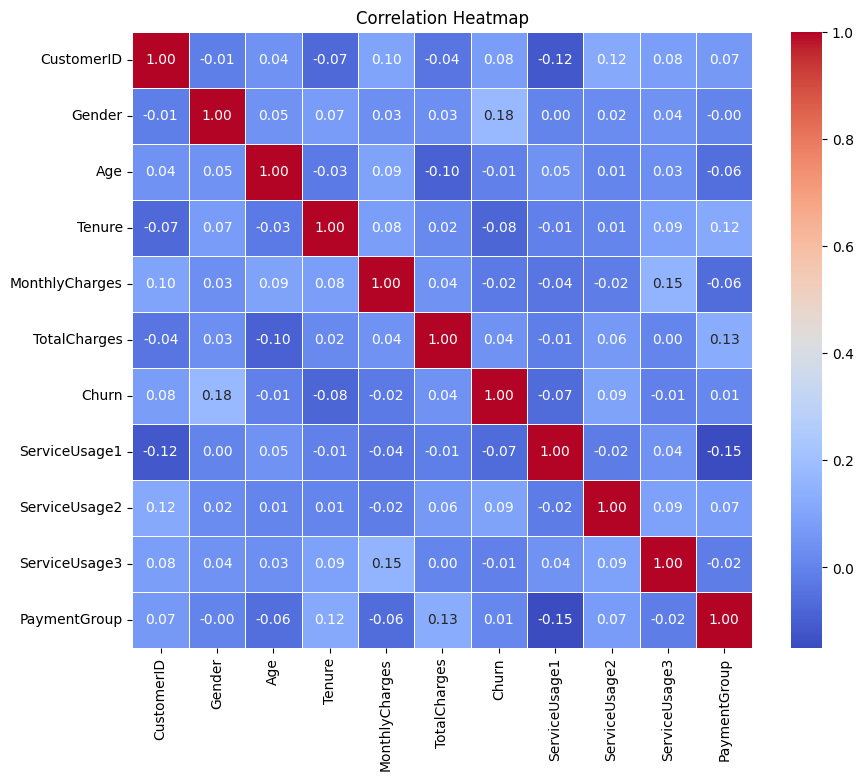

In [35]:
# Now since our dataset is completely in numerical format let's plot the correlation matrix

plt.figure(figsize=(10, 8))
correlation_matrix = customer_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### - There's weak positive correlation between Monthly Charges and Total Charges. 
### - Most/All features show weak/negligible correlation with `Churn`.
### - The lack of strong correlation implies no single feature has a strong linear relationship in a dataset.
### - So we need Additional Feature Engineering or non-linear modeling(like RandomForests, Decision trees) which might reveal hidden patterns that linear correlation cannot detect.

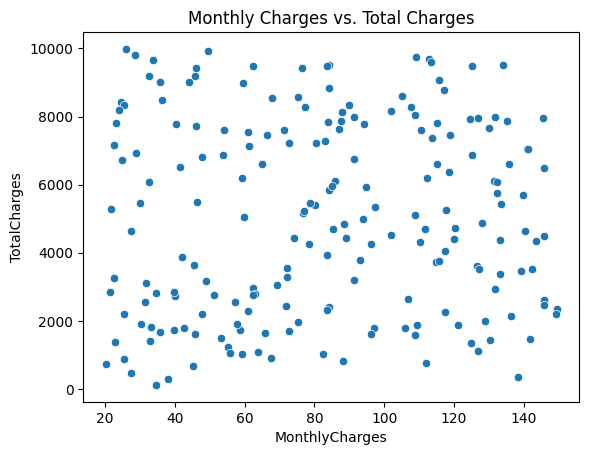

In [36]:
sns.scatterplot(data=customer_data, x='MonthlyCharges', y='TotalCharges')
plt.title('Monthly Charges vs. Total Charges')
plt.show()


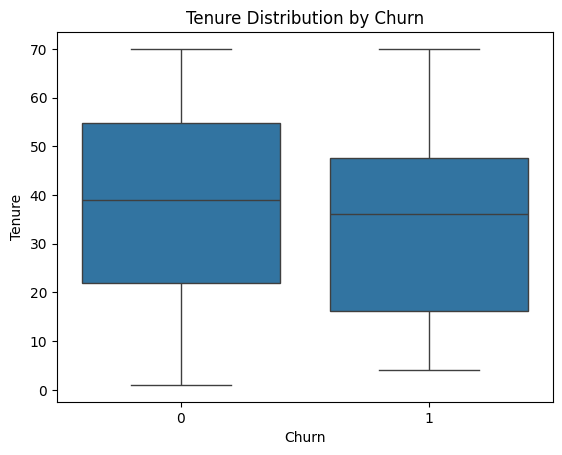

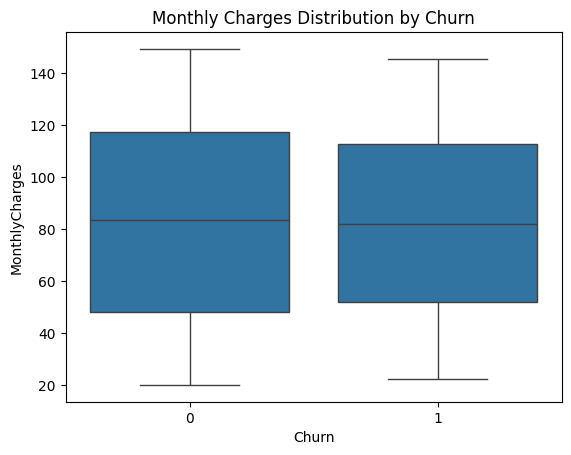

In [37]:
sns.boxplot(data=customer_data, x='Churn', y='Tenure')
plt.title('Tenure Distribution by Churn')
plt.show()

sns.boxplot(data=customer_data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn')
plt.show()


In [38]:
# view the data again
customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup
0,1,1,20,5,62.31,2950.41,1,59,20,63,1
1,2,0,25,23,118.96,7460.55,0,42,41,136,1
2,3,0,25,39,69.20,3064.73,0,65,0,165,1
3,4,1,56,47,145.90,2612.22,0,64,40,169,0
4,5,0,33,69,88.51,4833.99,0,62,1,54,0


### Feature Engineering: Adding New Columns

In [39]:
# Let's Create AverageSpendPerMonth
customer_data['AvgSpendPerMonth']=customer_data['TotalCharges']/(customer_data['Tenure']+1e-10) # To Avoid division by 0


In [40]:
# 2. Usage Patterns (Total Service used by consumer)
customer_data['TotalServiceUsage'] = (
    customer_data['ServiceUsage1'] + 
    customer_data['ServiceUsage2'] + 
    customer_data['ServiceUsage3']
)

customer_data.head()


,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup,AvgSpendPerMonth,TotalServiceUsage
0,1,1,20,5,62.31,2950.41,1,59,20,63,1,590.082000,142
1,2,0,25,23,118.96,7460.55,0,42,41,136,1,324.371739,219
2,3,0,25,39,69.20,3064.73,0,65,0,165,1,78.582821,230
3,4,1,56,47,145.90,2612.22,0,64,40,169,0,55.579149,273
4,5,0,33,69,88.51,4833.99,0,62,1,54,0,70.057826,117


In [41]:
# 3. Churn Rate (Indicates the churn Probability)
customer_data['ChurnRate'] = customer_data['Churn'] / (customer_data['Tenure'] + 1e-10) # Avoid division by 0

customer_data.head()


,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup,AvgSpendPerMonth,TotalServiceUsage,ChurnRate
0,1,1,20,5,62.31,2950.41,1,59,20,63,1,590.082000,142,0.2
1,2,0,25,23,118.96,7460.55,0,42,41,136,1,324.371739,219,0.0
2,3,0,25,39,69.20,3064.73,0,65,0,165,1,78.582821,230,0.0
3,4,1,56,47,145.90,2612.22,0,64,40,169,0,55.579149,273,0.0
4,5,0,33,69,88.51,4833.99,0,62,1,54,0,70.057826,117,0.0


In [42]:
# 4. Interaction Terms (Capture the effect of Tenure and Monthly charges together)
customer_data['Tenure_MonthlyCharges_Interaction'] = customer_data['Tenure'] * customer_data['MonthlyCharges']

customer_data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup,AvgSpendPerMonth,TotalServiceUsage,ChurnRate,Tenure_MonthlyCharges_Interaction
0,1,1,20,5,62.31,2950.41,1,59,20,63,1,590.082000,142,0.2,311.55
1,2,0,25,23,118.96,7460.55,0,42,41,136,1,324.371739,219,0.0,2736.08
2,3,0,25,39,69.20,3064.73,0,65,0,165,1,78.582821,230,0.0,2698.80
3,4,1,56,47,145.90,2612.22,0,64,40,169,0,55.579149,273,0.0,6857.30
4,5,0,33,69,88.51,4833.99,0,62,1,54,0,70.057826,117,0.0,6107.19


In [43]:
customer_data.to_csv('changed-data.csv',index=False)

### Multi-colinearity Check

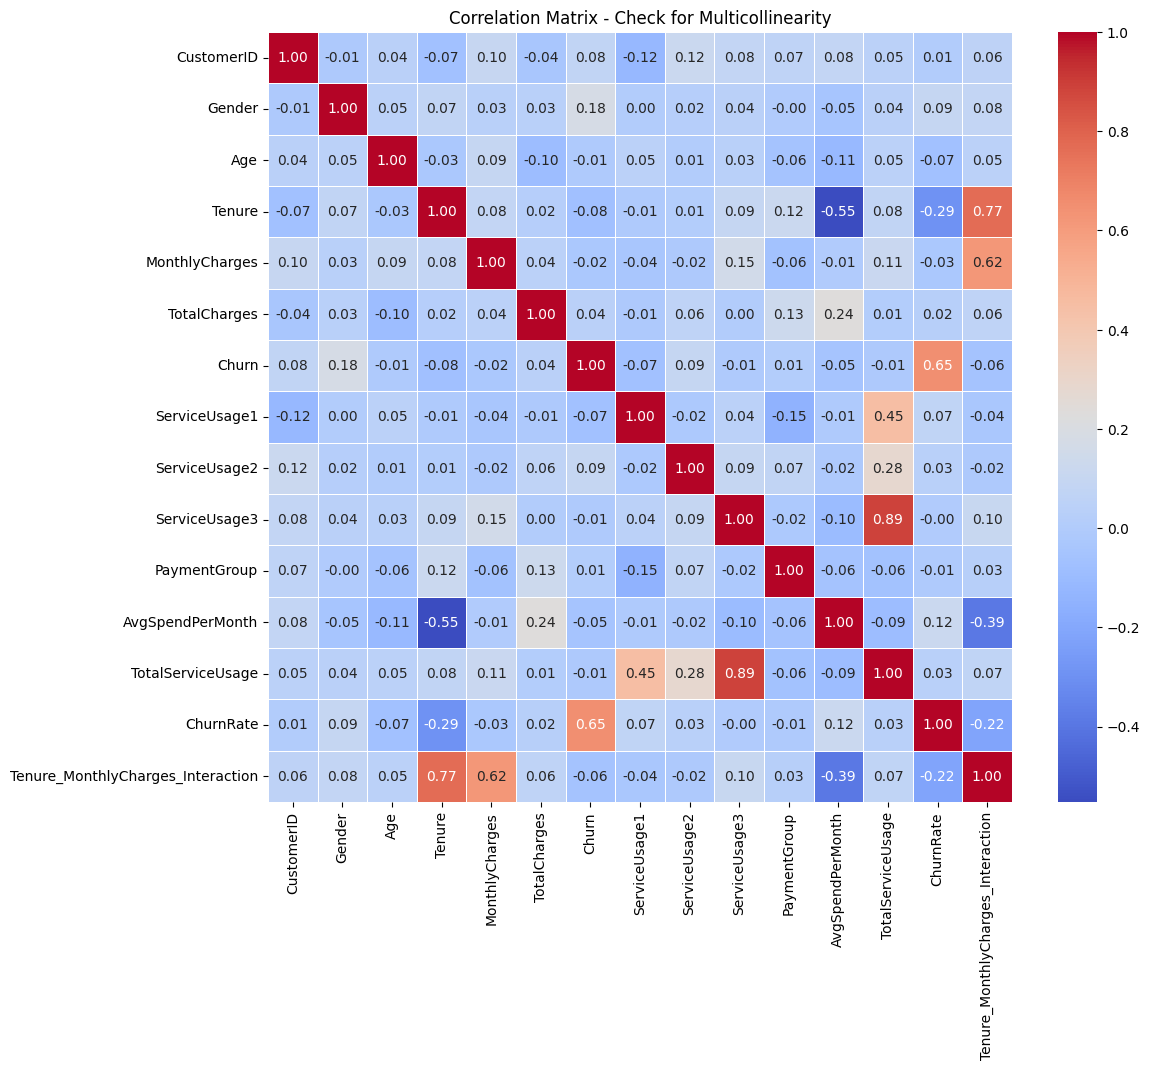

Highly Correlated Feature Pairs (correlation > 0.85):
TotalServiceUsage and ServiceUsage3: 0.89
Tenure_MonthlyCharges_Interaction and Tenure: 0.77


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = customer_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Check for Multicollinearity")
plt.show()

# Identify highly correlated features (absolute correlation > 0.85)
threshold = 0.75
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print highly correlated feature pairs
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No highly correlated feature pairs found.")


> This suggests that ServiceUsage3 contributes significantly to TotalServiceUsage, which makes sense since TotalServiceUsage is a sum of ServiceUsage1, ServiceUsage2, and ServiceUsage3

> I want to have granular control over how individual services impact churn, so i am keeping all separate ServiceUsage features and droping the aggregate.

> Let's Even Not use Tenure_MonthlyCharges_Interaction for Modeling due to slightly higher multicolinearity.

> Also the customer ID is not essential so let's drop that too.

In [45]:
# Dropping highly correlated/irrelevant features
customer_data.drop(columns=['CustomerID','Tenure_MonthlyCharges_Interaction','TotalServiceUsage'],inplace=True)

customer_data.head()

,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup,AvgSpendPerMonth,ChurnRate
0,1,20,5,62.31,2950.41,1,59,20,63,1,590.082000,0.2
1,0,25,23,118.96,7460.55,0,42,41,136,1,324.371739,0.0
2,0,25,39,69.20,3064.73,0,65,0,165,1,78.582821,0.0
3,1,56,47,145.90,2612.22,0,64,40,169,0,55.579149,0.0
4,0,33,69,88.51,4833.99,0,62,1,54,0,70.057826,0.0


### Feature Engineering: Handling Imbalanced data

In [46]:
# Let's see the balance
customer_data['Churn'].value_counts()

Churn
0    158
1     42
Name: count, dtype: int64

### - This indicates that data is highly imbalanced as only 21% Have Churned due to the model might struggle to learn patterns for minority class so let's balance the data.
### - Let's use oversampling(SMOTE) as i don't want to loose any info from majority class.

In [47]:
# Let's split the data into features and labels
X = customer_data.drop(columns='Churn', axis=1)
y=customer_data['Churn']


In [48]:
# Let's calculate the current churn percentage
current_churn_percentage=y.mean()
print(f"Current churn percentage: {current_churn_percentage * 100:.2f}%")

Current churn percentage: 21.00%


### Now I want to make it 35%, Not generating too many synthtic samples.

In [49]:
# Desired churn percentage
desired_churn_percentage = 0.35

# Calculate the required ratio for SMOTE
required_ratio = desired_churn_percentage / (1 - desired_churn_percentage)


In [50]:
# Apply SMOTE
smote = SMOTE(sampling_strategy=required_ratio, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [51]:
# Verify the new churn percentage
new_churn_percentage = y_resampled.mean()
print(f"New churn percentage: {new_churn_percentage * 100:.2f}%")


New churn percentage: 34.98%


In [52]:
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

df_resampled.head()

,Gender,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3,PaymentGroup,AvgSpendPerMonth,ChurnRate,Churn
0,1,20,5,62.31,2950.41,59,20,63,1,590.082000,0.2,1
1,0,25,23,118.96,7460.55,42,41,136,1,324.371739,0.0,0
2,0,25,39,69.20,3064.73,65,0,165,1,78.582821,0.0,0
3,1,56,47,145.90,2612.22,64,40,169,0,55.579149,0.0,0
4,0,33,69,88.51,4833.99,62,1,54,0,70.057826,0.0,0


In [53]:
# Let's check shape and balance
df_resampled['Churn'].value_counts(), df_resampled.shape

(Churn
 0    158
 1     85
 Name: count, dtype: int64,
 (243, 12))

In [54]:
# Let's save the resampled data for later use
df_resampled.to_csv('resampled-data.csv', index=False)

In [109]:
X_resampled.shape, y_resampled.shape

((243, 11), (243,))

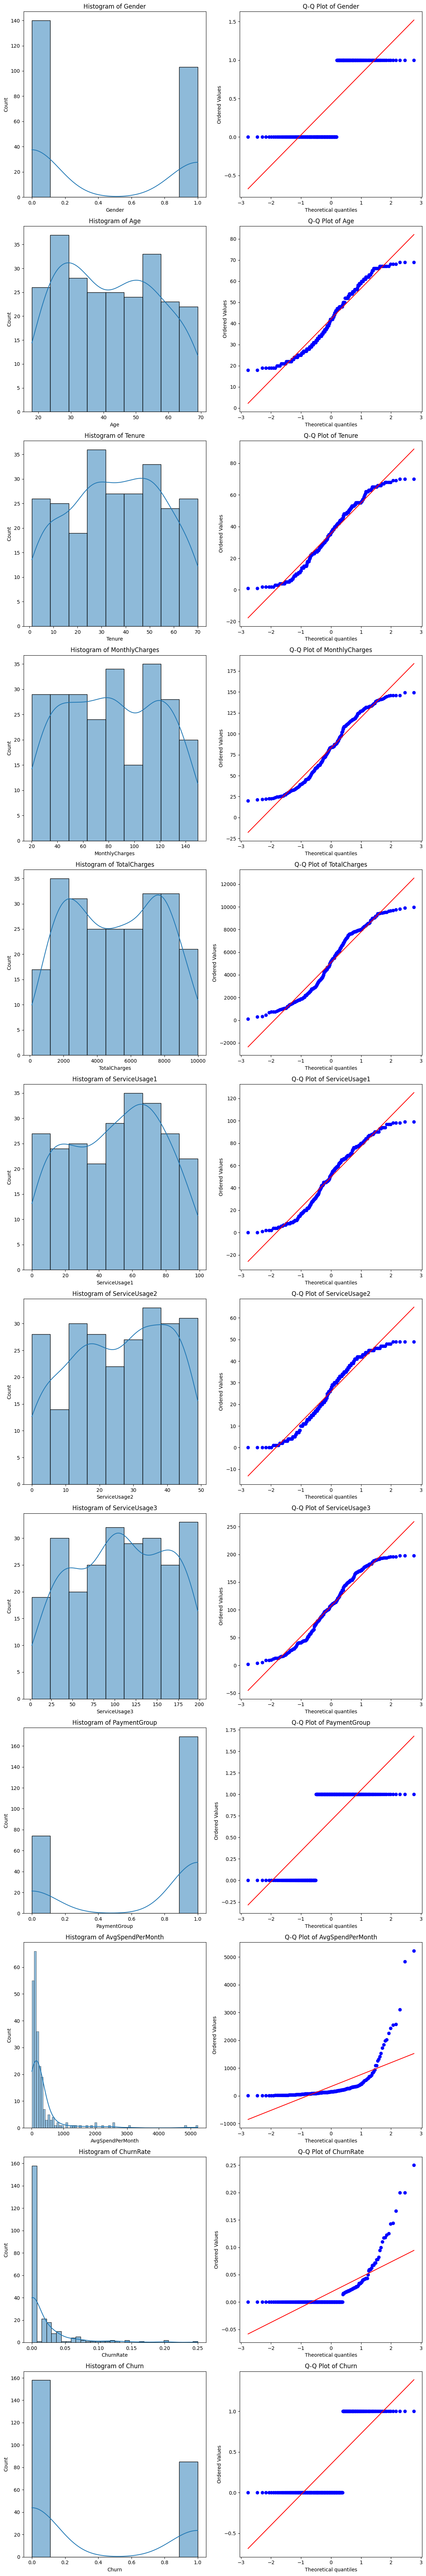

In [55]:
# Let's check what distribution the resampled data have
# Number of features
num_features = df_resampled.shape[1]

# Create subplots
fig, axes = plt.subplots(num_features, 2, figsize=(12, num_features * 6))

for i, feature in enumerate(df_resampled.columns):
    # Plot histogram
    sns.histplot(df_resampled[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Plot Q-Q plot
    stats.probplot(df_resampled[feature], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {feature}')

plt.tight_layout()
plt.show()

### Feature Scaling

Let's perform Normalization

In [56]:
# Let's initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X_resampled)

Now that our data is completely ready let's proceed with modeling.


### Task 3: Modeling

In [57]:
# Before modeling let's check the shapes of X_normalized and y_resampled
X_normalized.shape, y_resampled.shape

((243, 11), (243,))

In [58]:
# Now let's split the data into training and testing sets

# Set the seed for reproducibility
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_resampled, test_size=0.2)


In [59]:
# Let's have a look at the shapes of splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [60]:
X_train

array([[1.        , 0.7254902 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.7826087 , ..., 0.        , 0.02180009,
        0.07547793],
       [1.        , 0.56862745, 0.53623188, ..., 1.        , 0.0035219 ,
        0.10526316],
       ...,
       [1.        , 0.84313725, 0.24637681, ..., 0.        , 0.06466413,
        0.        ],
       [0.        , 0.80392157, 0.08695652, ..., 0.        , 0.05899389,
        0.        ],
       [0.        , 0.78431373, 0.92753623, ..., 0.        , 0.01212574,
        0.        ]])

> Now According to our hypothesis above (from feature Engineering) Models like `RandomForest` and `DecisionTrees` Should perform better. However Let's check the performance of `LogisticRegression` Too.

In [61]:
# Importing the necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [62]:
# Put models in a dictionary
models={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear')
}

In [63]:
# Create function to fit, predict, and score models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Evaluate the model and store its scores
        model_scores[name] = {
            'accuracy': model.score(X_test, y_test),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'f1_score': f1_score(y_test, y_pred, average='weighted'),
            'classification_report': classification_report(y_test, y_pred)
        }
    return model_scores



In [64]:
# Fit and score the models
model_scores = fit_and_evaluate(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)




In [65]:
# Display the model scores
for model_name, scores in model_scores.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"Precision: {scores['precision']}")
    print(f"Recall: {scores['recall']}")
    print(f"F1 Score: {scores['f1_score']}")
    print(f"Classification Report:\n{scores['classification_report']}")
    print("\n")
    


Model: Logistic Regression
Accuracy: 0.8571428571428571
Precision: 0.880952380952381
Recall: 0.8571428571428571
F1 Score: 0.8398268398268398
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        35
           1       1.00      0.50      0.67        14

    accuracy                           0.86        49
   macro avg       0.92      0.75      0.79        49
weighted avg       0.88      0.86      0.84        49



Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cla

In [66]:
model_scores

{'Logistic Regression': {'accuracy': 0.8571428571428571,
  'precision': 0.880952380952381,
  'recall': 0.8571428571428571,
  'f1_score': 0.8398268398268398,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91        35\n           1       1.00      0.50      0.67        14\n\n    accuracy                           0.86        49\n   macro avg       0.92      0.75      0.79        49\nweighted avg       0.88      0.86      0.84        49\n'},
 'Random Forest': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1_score': 1.0,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        35\n           1       1.00      1.00      1.00        14\n\n    accuracy                           1.00        49\n   macro avg       1.00      1.00      1.00        49\nweighted avg       1.00      1.00      1.00        49\n'},
 'Decision Tree': {

In [67]:
# Removing the classification report from each internal dictionary
for model in model_scores:
    if 'classification_report' in model_scores[model]:
        del model_scores[model]['classification_report']

In [68]:
# Convert the filtered dictionary to a DataFrame
model_scores_df = pd.DataFrame.from_dict(model_scores, orient='index')

model_scores_df


,accuracy,precision,recall,f1_score
Logistic Regression,0.857143,0.880952,0.857143,0.839827
Random Forest,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
SVM,0.877551,0.895470,0.877551,0.865687


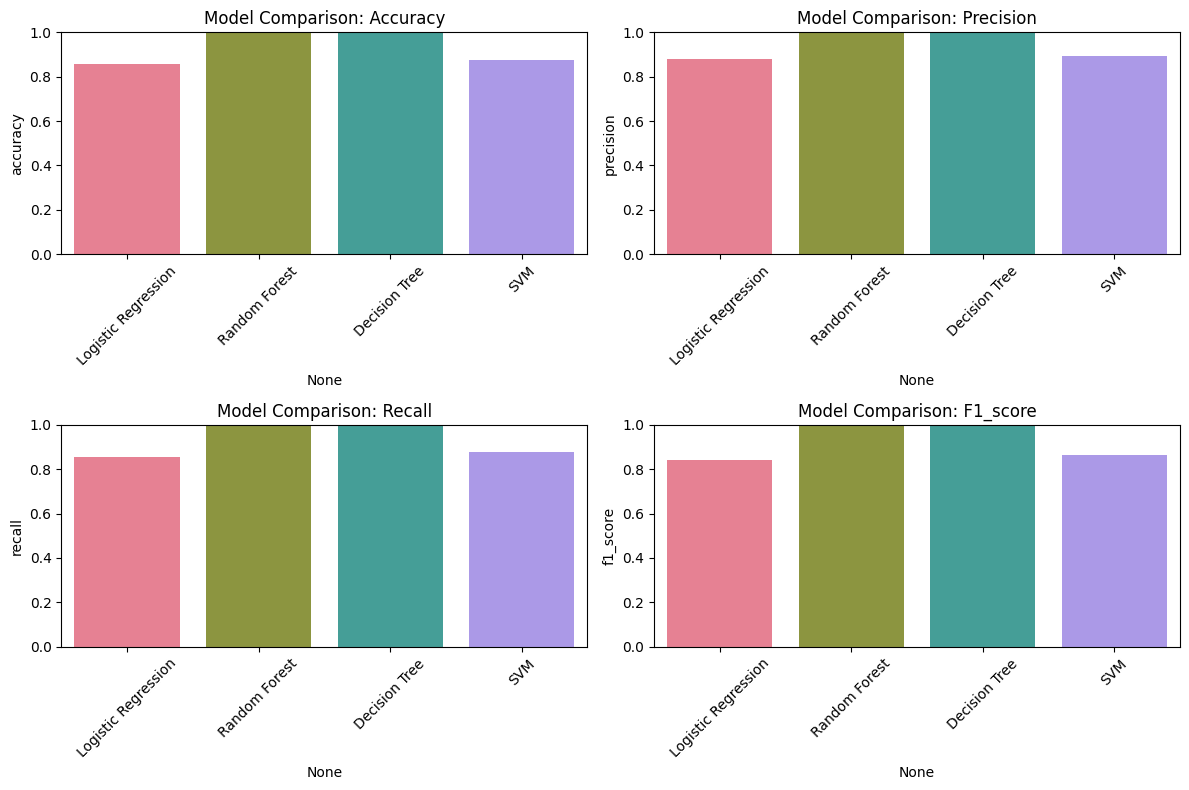

In [69]:
# Define a color palette
palette = sns.color_palette("husl", len(model_scores_df))

# Plot the metrics
plt.figure(figsize=(12, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=model_scores_df.index, y=metric, data=model_scores_df, palette=palette)
    plt.title(f'Model Comparison: {metric.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

> From the results as we can see that `RandomForest` and `Decision Tree` have perfect scores. Let's perform Hyperparameter tuning and Cross-validaion to improve the performance of the models and get more accurate results.

In [70]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Hyperparameter grid for DecisionTreeClassifier
dt_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [None, "auto", "sqrt", "log2"]
}

In [71]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [72]:
# Tune RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_random_forest.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [73]:
# Find the best parameters
rs_random_forest.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [74]:
# Evaluate the randomized search RandomForestClassifier model
rs_random_forest.score(X_test, y_test)

1.0

In [75]:
# Tune DesicionTreeClassifier

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for DecisionTreeClassifier
rs_decision_tree = RandomizedSearchCV(DecisionTreeClassifier(), 
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_decision_tree.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [76]:
# Find the best parameters
rs_decision_tree.best_params_

{'splitter': 'best',
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(7),
 'max_features': None,
 'max_depth': 40,
 'criterion': 'entropy'}

In [77]:
# Evaluate the randomized search DecisionTreeClassifier model
rs_decision_tree.score(X_test, y_test)

1.0

In [78]:
# Let's make predictions with the tuned RandomForestClassifier
y_preds_rf = rs_random_forest.predict(X_test)

In [79]:
# Let's make predictions with the tuned DecisionTreeClassifier
y_preds_dt = rs_decision_tree.predict(X_test)

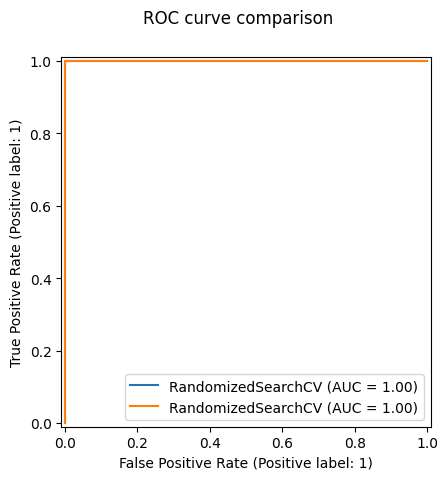

In [80]:
# Plot ROC curve and compare with DecisionTreeClassifier
rfc_disp = RocCurveDisplay.from_estimator(rs_random_forest, X_test, y_test)
dtc_disp = RocCurveDisplay.from_estimator(rs_decision_tree, X_test, y_test, ax=rfc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [81]:
# Function to plot confusion matrix
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    


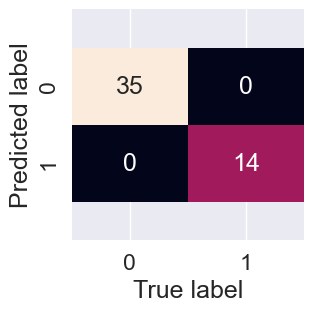

In [82]:
# Confusion matrix for RandomForestClassifier
plot_conf_mat(y_test, y_preds_rf)

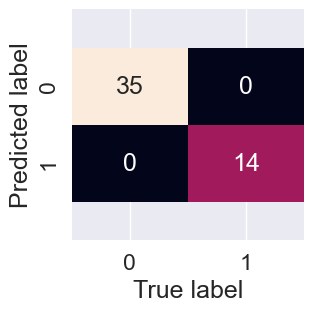

In [83]:
# Confusion matrix for DecisionTreeClassifier
plot_conf_mat(y_test, y_preds_dt)

In [84]:
# Classification report for tuned RandomForestClassifier
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [85]:
# Classification report for tuned DecisionTreeClassifier
print(classification_report(y_test, y_preds_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



> As we can see both `RandomForestClassifier` and `DecisionTreeClassifier` has acheived perfect scores even after HyperParameterTuning with cross-validation. This is due to the fact that the dataset is very small hence these models have completely captured all patterns of the dataset (As these models have capability to capture complex relations).

> However Relying on this systems/models would be in-efficient in production/real-world environment as these are trained on very small dataset and even though it's metrics are perfect it's prediction in real-world not neccessarly would be true.


### Task 4: Model Interpretation

### Model Interpretation: Feature Importance

In [86]:
# Extract feature importances from the tuned RandomForestClassifier
feature_importances_rs_rf = rs_random_forest.best_estimator_.feature_importances_

In [87]:
# Get the feature names data
features=X_resampled.columns

features

Index(['Gender', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3', 'PaymentGroup',
       'AvgSpendPerMonth', 'ChurnRate'],
      dtype='object')

In [88]:
# Create the dataframe of feature importances
feature_imp_df_rf=pd.DataFrame({'Features':features,'Importance':feature_importances_rs_rf})

feature_imp_df_rf

,Features,Importance
0,Gender,0.057876
1,Age,0.040166
2,Tenure,0.044881
3,MonthlyCharges,0.035808
4,TotalCharges,0.039845
5,ServiceUsage1,0.058243
6,ServiceUsage2,0.071320
7,ServiceUsage3,0.030368
8,PaymentGroup,0.025919
9,AvgSpendPerMonth,0.044625


In [89]:
# Sort features by importance
features_imp_rf = feature_imp_df_rf.sort_values(by='Importance', ascending=False)
features_imp_rf

,Features,Importance
10,ChurnRate,0.550949
6,ServiceUsage2,0.071320
5,ServiceUsage1,0.058243
0,Gender,0.057876
2,Tenure,0.044881
9,AvgSpendPerMonth,0.044625
1,Age,0.040166
4,TotalCharges,0.039845
3,MonthlyCharges,0.035808
7,ServiceUsage3,0.030368


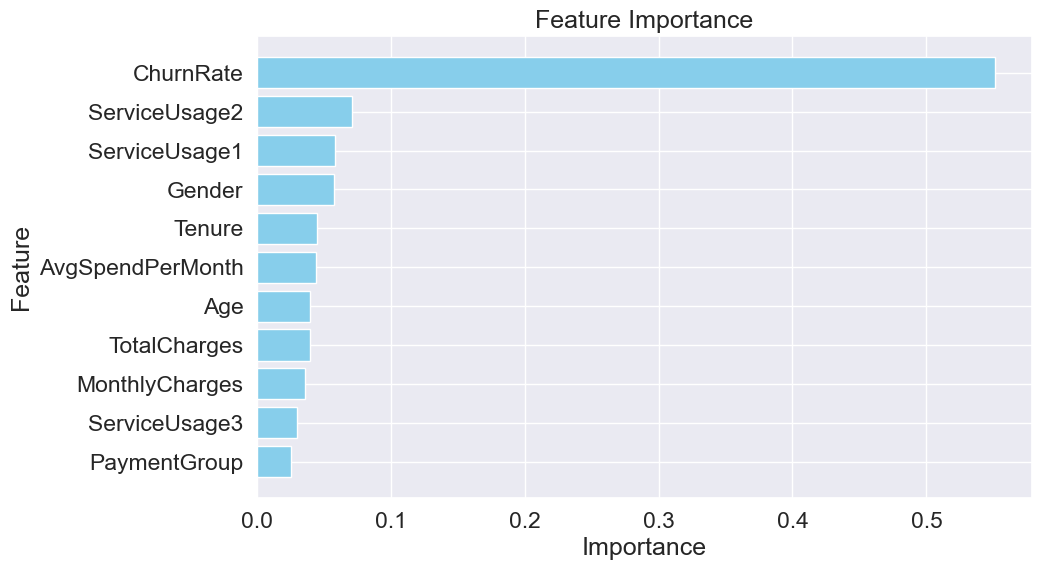

In [90]:
# Let's plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_imp_rf['Features'], features_imp_rf['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### This indicates that `ChrunRate` is the most important feature and ServiceUsage1&2, Gender, Tenure and AvgSpendPerMonth contributes mostly to churn.

In [91]:
# Let's do the same for DecisionTreeClassifier

# Extract feature importances from the tuned DecisionTreeClassifier
feature_importances_rs_dt = rs_decision_tree.best_estimator_.feature_importances_

# Create the dataframe of feature importances
feature_imp_df_dt=pd.DataFrame({'Features':features,'Importance':feature_importances_rs_dt})

# Sort features by importance
features_imp_dt = feature_imp_df_dt.sort_values(by='Importance', ascending=False)
features_imp_dt


,Features,Importance
10,ChurnRate,1.0
0,Gender,0.0
1,Age,0.0
2,Tenure,0.0
3,MonthlyCharges,0.0
4,TotalCharges,0.0
5,ServiceUsage1,0.0
6,ServiceUsage2,0.0
7,ServiceUsage3,0.0
8,PaymentGroup,0.0


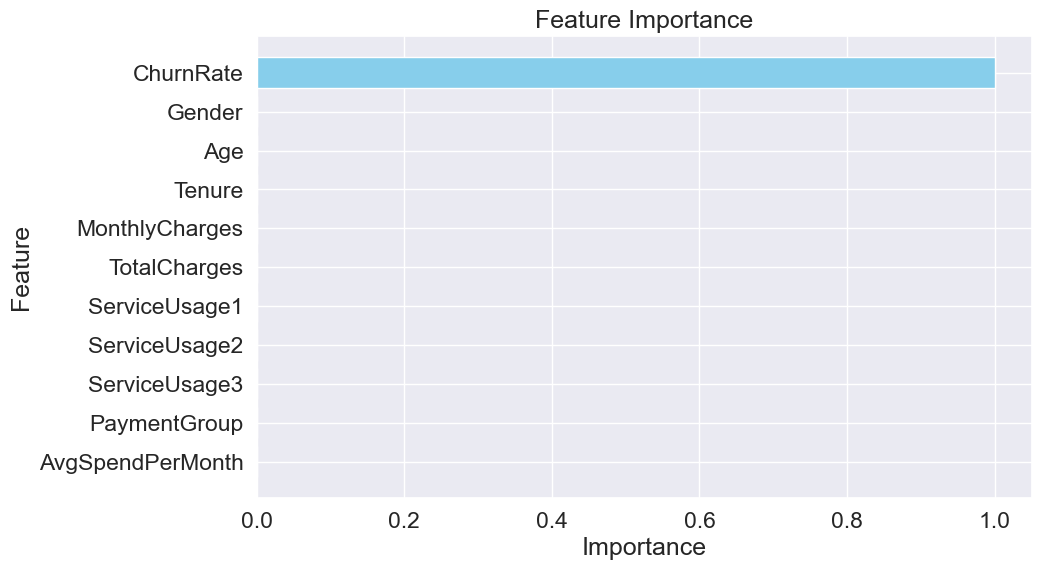

In [92]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_imp_dt['Features'], features_imp_dt['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Below is Detailed Explanation Provided for this Behaviour

Decision Trees:
- A Decision Tree is a single tree structure where each node represents a feature (or attribute), each branch represents a decision rule, and each leaf represents an outcome. The tree is built by splitting the dataset based on the feature that provides the maximum information gain (or minimum Gini impurity) at each step.

Key Points:
- Decision Trees are prone to overfitting, especially if they are deep.
- They can be biased towards features that have more levels (categories).

Random Forests:
- A Random Forest is an ensemble method that builds multiple Decision Trees and merges them together to get a more accurate and stable prediction. Each tree in a Random Forest is trained on a random subset of the data and a random subset of the features.

Key Points:
- Random Forests reduce overfitting by averaging multiple trees.
- They provide feature importance by averaging the importance of each feature across all trees.

Why the Difference?
- Single Tree vs. Multiple Trees: A Decision Tree might find one feature (like ChurnRate) to be the most important for making splits, while a Random Forest, by considering multiple trees, can capture the importance of other features that might not be the best split in a single tree but are useful across multiple trees.

- Overfitting: A single Decision Tree can overfit to the training data, capturing noise and making it seem like one feature is overwhelmingly important. Random Forests, by averaging multiple trees, reduce overfitting and provide a more balanced view of feature importance.

- Feature Interaction: Random Forests can capture interactions between features better than a single Decision Tree. This means that features that work well together can be identified as important in a Random Forest, even if they are not the best single feature in any individual tree.


### Moving Forward I'll be only considering RandomForest (Deployment)